# __INDIAN STARTUP ECOSYSTEM__


## Project Description
We embark on a journey of discovery as we leverage our data analysis expertise to uncover the untapped potential within the Indian startup ecosystem. This project is designed to not only decode the numbers but to distill insights that will guide our team towards a successful foray into this dynamic market. 

## Scope of Work
Conduct a thorough exploration of datasets, dissecting funding patterns, sectoral nuances, and geographical hotspots in the Indian startup landscap Analyze funding received by startups in india from 2018 to 2021.

## Hypotheses
H0 : There is no significant relationship between funding and the sector

H1 : There is a significant relationship between funding and the sector



## Questions
1. How does funding vary across different industry sectors in India?

2. How does funding vary with the location of the start-ups

3. What is the relationship between the amount of funding and the stage of the company?

4. How have funding trends evolved between 2018 and 2021?
5. What are the most attractive sectors for investors?
6. Does the location of the company influence its sector?


### __1. DATA EXPLORATION, DATA UNDERSTANDING and DATA ANALYSIS__


In [2]:

# LOADING LIBRARIES


# For data manipulation
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.dates import YearLocator
from matplotlib.ticker import FuncFormatter
#For statistical analysis
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

# for database connection
import pyodbc
from dotenv import dotenv_values
import os

# Filter warnings
import warnings
warnings.filterwarnings("ignore")
print("loading complete")



loading complete


### __1.1 Loading and Inspection of Data__

__a. Loading data from SQL server__

In [3]:
##Loading environment variables from .env files 
environment_variables = dotenv_values(".env")

##Getting values of the credentials set in the .env file
server = os.getenv("SERVER")
database = os.getenv("DATABASE")
username = os.getenv("USERNAME")
password = os.getenv("PASSWORD")

##Constructing the connection string
connection_string = f"DRIVER=SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [4]:
connection = pyodbc.connect(connection_string)

In [5]:
##sql query to retrieve data from the table LP1_startup_2020
query_2020="SELECT * FROM dbo.LP1_startup_funding2020"

##sql query to retrieve data from table LP1_startup_funding2021
query_2021="SELECT * FROM dbo.LP1_startup_funding2021"

##execute the sql query and load into pandas DataFrame
data_2020 = pd.read_sql(query_2020,connection)
data_2021 = pd.read_sql(query_2021,connection)

### __1.2 Loading CSV Files__

In [6]:

data_2019 = pd.read_csv(r"C:\Users\USER\Desktop\LP1-Dubnium2\startup_funding2019.csv")
data_2019['year'] = 2019

In [7]:
data_2018 = pd.read_csv(r"\Users\USER\Desktop\LP1-Dubnium2\startup_funding2018.csv")
data_2018['year'] = 2018


 ### __2. Exploratory Data Analaysis(EDA)__ ###
 #### __2.1 2018 Dataset EDA__ 

In [8]:
# Overview of 2018 dataset
data_2018.head(3)


,Company Name,Industry,Round/Series,Amount,Location,About Company,year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018


In [9]:
# checking for number of columns and rows
print (data_2018.shape)
print(f"There are {data_2018.shape[0]} rows, and {data_2018.shape[1]} columns")

(526, 7)
There are 526 rows, and 7 columns


In [10]:
# checking info
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [11]:
# Describing the data
data_2018.describe(include= 'all') 

,Company Name,Industry,Round/Series,Amount,Location,About Company,year
count,526,526,526,526,526,526,526.0
unique,525,405,21,198,50,524,NaN
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN
freq,2,30,280,148,102,2,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.0


In [12]:
# checking for duplicates
print("There are ",data_2018.duplicated().sum(),"duplicate(s)")

There are  1 duplicate(s)


In [13]:
# Checking for missing values
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
year             0
dtype: int64

#### __2.2 2019 Dataset EDA__ 

In [14]:
# Overview of 2019 dataset
data_2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019


In [15]:
# checking for number of columns and rows
print (data_2019.shape)
print(f"There are {data_2019.shape[0]} rows, and {data_2019.shape[1]} columns")


(89, 10)
There are 89 rows, and 10 columns


In [16]:
# checking for duplicates
print("There are ",data_2019.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [17]:
# Checking for nulls
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
year              0
dtype: int64

In [18]:
# checking for datatypes in the different columns
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [19]:
# performing descriptive analysis
data_2019.describe(include='all')

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year
count,89,60.000000,70,84,89,86,89,89,43,89.0
unique,87,NaN,17,52,88,85,86,50,15,NaN
top,Kratikal,NaN,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A,NaN
freq,2,NaN,21,7,2,2,3,12,10,NaN
mean,NaN,2014.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
std,NaN,2.937003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
50%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
75%,NaN,2016.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


Findings

Kratikal company was the most common company

Most companies had their headquarters based in Bangalore

Majority of the companies are involved in the Edtech sector

#### __2.3 2020 Dataset EDA__ 

In [20]:
# Overview of 2018 dataset
data_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [21]:
#checking for number of columns and rows
print (data_2020.shape)
print(f"There are {data_2020.shape[0]} rows, and {data_2020.shape[1]} columns")

(1055, 10)
There are 1055 rows, and 10 columns


In [22]:
# checking for duplicates
print("There are ",data_2020.duplicated().sum(),"duplicate(s)")

There are  3 duplicate(s)


In [23]:
# Checking for nulls
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [24]:
# checking for datatypes in the different columns
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [25]:
# Describe the data
data_2020.describe(include='all')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
count,1055,842.000000,961,1042,1055,1043,1017,8.010000e+02,591,2
unique,905,NaN,77,302,990,927,848,NaN,42,2
top,Nykaa,NaN,Bangalore,Fintech,Provides online learning classes,Falguni Nayar,Venture Catalysts,NaN,Series A,Pre-Seed
freq,6,NaN,317,80,4,6,20,NaN,96,1
mean,NaN,2015.363420,NaN,NaN,NaN,NaN,NaN,1.130430e+08,NaN,NaN
std,NaN,4.097909,NaN,NaN,NaN,NaN,NaN,2.476635e+09,NaN,NaN
min,NaN,1973.000000,NaN,NaN,NaN,NaN,NaN,1.270000e+04,NaN,NaN
25%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,NaN
50%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,1.100000e+07,NaN,NaN


Findings

Nykaa company was the most common company

Majority of the companies had their headquarter at Bangalore

The average Amount invested was 113042969.54

#### __2.4 2021 Dataset EDA__ 

In [26]:
# Overview of 2018 dataset
data_2020.head(3)


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [27]:
# get the number of rows and columns for the datasets
print(f'{data_2021.shape}')

print(f"The 2021 dataset has {data_2021.shape[0]} rows and {data_2021.shape[1]} Columns")

(1209, 9)
The 2021 dataset has 1209 rows and 9 Columns


In [28]:
# checking for duplicates
print("There are ",data_2021.duplicated().sum(),"duplicate(s)")

There are  19 duplicate(s)


In [29]:
#  Checking for nulls
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [30]:
# checking for datatypes in the different columns
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [31]:
# Describe the dataset
data_2021.describe(include='all')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,1209,1208.000000,1208,1209,1209,1205,1147,1206,781
unique,1033,NaN,70,254,1143,1095,937,278,31
top,BharatPe,NaN,Bangalore,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,$Undisclosed,Seed
freq,8,NaN,426,122,4,7,24,73,246
mean,NaN,2016.655629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.517364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Findings__

- BharatPe is the most common company

- Most companies invested in the FinTech sector

- Majority of the companies were found in Bangalore

__Overall Observations: Issues with the data__

There is a discrepancy in the naming conventions between the columns in the 2018 and 2019 datasets compared to the 2020 and 2021 datasets.

The 2018 dataset exhibits some missing columns, contributing to an incomplete representation of the data.

Conversely, the 2020 dataset contains an additional column that appears to be extraneous and does not serve a meaningful purpose in our analysis.

__Course of Action:__

__Missing Column Engineering for 2018:__

We will address the absence of certain columns in the 2018 dataset by employing data engineering techniques to create and populate the missing columns, ensuring a comprehensive and consistent dataset.
Column Name Standardization:

To establish uniformity and coherence across all datasets, we will embark on a column renaming process for the 2018 and 2019 datasets. This action aims to align the naming conventions with those observed in the 2020 and 2021 datasets, facilitating seamless data integration and analysis.
Extraneous Column Removal in 2020:

The redundant column identified in the 2020 dataset will be removed, streamlining the dataset and eliminating unnecessary elements that do not contribute to the overall analysis objectives.
These actions collectively enhance the integrity, consistency, and completeness of the dataset, paving the way for a more robust and coherent analytical process. ical process.

 #### Displaying Datasets columns

In [32]:
print("columns for 2021_dataset:","\n",data_2021.columns)
print("columns for 2020_dataset:","\n",data_2020.columns)
print("columns for 2019_dataset:","\n",data_2019.columns)
print("columns for 2018_dataset:","\n",data_2018.columns)

columns for 2021_dataset: 
 Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')
columns for 2020_dataset: 
 Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')
columns for 2019_dataset: 
 Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'year'],
      dtype='object')
columns for 2018_dataset: 
 Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company', 'year'],
      dtype='object')


## 3. __Data Cleaning and Preparation__

### 3.1. __Convert Indian Rupee values in the 2018 data to dollars__ ###

In [33]:
# Replace '₹', commas, '—', and "''" in 'Amount' column
data_2018['Amount'] = data_2018['Amount'].str.replace(',', '').str.replace('—', '').str.replace("''",'').replace('', np.nan)

# Conditionally apply multiplication only where '₹' is present
mask = data_2018['Amount'].str.contains('₹', na=False)
data_2018.loc[mask, 'Amount'] = data_2018.loc[mask, 'Amount'].str.replace('₹', '').astype(float) * 0.0146


In [34]:
# add year when data was collected column to every dataset
data_2018['year'] = pd.to_datetime('2018', format='%Y').year
data_2019['year'] = pd.to_datetime('2019', format='%Y').year
data_2020['year'] = pd.to_datetime('2020', format='%Y').year
data_2021['year'] = pd.to_datetime('2021', format='%Y').year

Add year data was collected
There is need to add a column that represents the year each dataset was collected. This will help with handling the datasets after merging the dataframes

#### Concatinating our datasets i.e data_2021, data_2020, data_2019, data_2018

In [35]:
def concat_dataframes(data_2020,data_2021,data_2018,data_2019):
    """
    Concatenates four dataframes along the row axis.
 
    Parameters:
    data_2020 (pandas.DataFrame): The first dataframe to concatenate.
    data_2021 (pandas.DataFrame): The second dataframe to concatenate.
    LP1_dataset (pandas.DataFrame): The third dataframe to concatenate.
    LP2_dataset (pandas.DataFrame): The fourth dataframe to concatenate.
 
    Returns:
    pandas.DataFrame: The concatenated dataframe.
    """
    # Rename columns to make them consistent across dataframes
    df1 = data_2020.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series'})
    df2 = data_2021.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series'})
    df3 = data_2019.rename(columns={'Company/Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What it does': 'about_company','Founders':'founders','Investor':'investor','Amount($)':'amount','Stage':'series'})
    df4 = data_2018.rename(columns={'Company Name': 'company_brand','Location': 'headquarter','Industry': 'sector','About Company': 'about_company','Amount':'amount','Round/Series':'series'})
 
    # Concatenate dataframes along the row axis
    result = pd.concat([df1,df2,df3,df4], axis=0).reset_index(drop=True)
 
    return result

In [36]:
## combined dataset (df)
df = concat_dataframes(data_2020,data_2021,data_2018,data_2019)
df.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,column10,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [37]:
# overview of combined dataset(2018-2021)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   about_company  2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2474 non-null   object 
 8   series         1941 non-null   object 
 9   column10       2 non-null      object 
 10  year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


In [38]:
df.shape

(2879, 11)

In [39]:
df.describe()

,founded,year
count,2110.000000,2879.000000
mean,2016.079621,2020.023619
std,4.368006,1.086974
min,1963.000000,2018.000000
25%,2015.000000,2020.000000
50%,2017.000000,2020.000000
75%,2019.000000,2021.000000
max,2021.000000,2021.000000


In [40]:
df.describe(include='all')

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,column10,year
count,2879,2110.000000,2765,2861,2879,2334,2253,2474,1941,2,2879.000000
unique,2214,NaN,172,873,2691,1980,1777,771,75,2,NaN
top,BharatPe,NaN,Bangalore,FinTech,Provides online learning classes,Byju Raveendran,Inflection Point Ventures,$Undisclosed,Seed,Pre-Seed,NaN
freq,10,NaN,764,173,5,7,36,73,606,1,NaN
mean,NaN,2016.079621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.023619
std,NaN,4.368006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.086974
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000
75%,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000


In [41]:
df.isna().sum()

company_brand       0
founded           769
headquarter       114
sector             18
about_company       0
founders          545
investor          626
amount            405
series            938
column10         2877
year                0
dtype: int64

In [42]:
df.duplicated().sum()

23

In [43]:
df.nunique()

company_brand    2214
founded            34
headquarter       172
sector            873
about_company    2691
founders         1980
investor         1777
amount            771
series             75
column10            2
year                4
dtype: int64

#### OBSERVATION

Issues with the data
1. There is a discrepancy in the naming conventions between the columns in the 2018 and 2019 datasets compared to the 2020 and 2021 datasets.

2. The 2018 dataset exhibits some missing columns, contributing to an incomplete representation of the data.

3. Conversely, the 2020 dataset contains an additional column that appears to be extraneous and does not serve a meaningful purpose in our analysis.

##### Course of Action:
 **1. Missing Column Engineering for 2018:**
---> We will address the absence of certain columns in the 2018 dataset by employing data engineering techniques to create and populate the missing columns, ensuring a comprehensive and consistent dataset.

**2. Column Name Standardization:**
---> To establish uniformity and coherence across all datasets, we will embark on a column renaming process for the 2018 and 2019 datasets. This action aims to align the naming conventions with those observed in the 2020 and 2021 datasets, facilitating seamless data integration and analysis.

**3. Extraneous Column Removal in 2020:**
---> The redundant column identified in the 2020 dataset will be removed, streamlining the dataset and eliminating unnecessary elements that do not contribute to the overall analysis objectives.

These actions collectively enhance the integrity, consistency, and completeness of the dataset, paving the way for a more robust and coherent analytical process. ical process



BUSINESS QUESTIONS

1. How does funding vary across different industry sectors in India?
2. How does funding vary with the loaction of the start-ups
3. What is the relationship between the amount of funding and the stage of the company?
4. How have funding trends evolved between 2018 and 2021?
5. What are the most attractive sectors for investors?
6. Does the location of the company influence its sector?
 

In [44]:
#Drop the extreneous column 10
df.drop('column10', axis=1, inplace= True)

### __4. DATA CLEANING ON EACH COLUMN__

#### __4.0 Cleaning 'Amount' column__ ####

__Notes__

- Remove all currency signs

- Remove all other umwanted characters, words and symbols

- Fill the nulls uning interpolate method

- Convert the column from object to float

In [45]:


df['amount']=df['amount'].replace('\$','',regex=True)
df['amount']=df['amount'].replace(['Undisclosed','undisclosed',None],np.NAN)
df['headquarter']=df['headquarter'].str.strip('\t#REF!')
df['amount']=df['amount'].replace('\,','',regex=True)
df['amount']=df['amount'].replace(",","")

In [46]:


# fix index 242
df.at[242, 'headquarter'] = None
df.at[242, 'sector'] = 'Pharmaceuticals'
df.at[242, 'founders'] = 'Varun Khanna'
df.at[242, 'investor'] = 'Morgan Stanley Private Equity Asia'
df.at[242, 'amount'] = '22000000'
df.at[242, 'series'] = 'Series C'
df.at[242, 'about_company'] = 'Development and Manufacturing'

# drop the duplicate row
df = df.drop(256, axis=0, errors='ignore')

# fix index 1148
df.at[1148, 'sector'] = 'Logistics'
df.at[1148, 'founders'] ='Basant Kumar' 
df.at[1148, 'investor'] =None
df.at[1148, 'amount'] = 1000000
df.at[1148, 'series'] = 'Seed'
 
# fix index 257
df.at[257, 'sector'] = 'Transport'
df.at[257, 'founders'] ='Anshuman Maheshwary'
df.at[257, 'investor'] =None
df.at[257, 'amount'] = 5000000
df.at[257, 'series'] = 'Seed'

# fix index 98
df.at[98, 'sector'] = 'Computer Games'
df.at[98, 'founders'] ='Pritesh Kumar'
df.at[98, 'investor'] =None
df.at[98, 'amount'] = 1200000
df.at[98, 'series'] = 'Seed'

# drop the duplicate column
df = df.drop(111, axis=0, errors='ignore')

# fix index 677
df.at[677, 'amount'] = 1000000
df.at[677, 'series'] = 'Angel'

# fix index 545
df.at[545, 'investor'] =None
df.at[545, 'amount'] = 1000000
df.at[545, 'series'] = 'Pre-series A'

# fix index 538
df.at[538, 'investor'] =None
df.at[538, 'amount'] = 300000
df.at[538, 'series'] = 'Pre-Seed'

# fix index 551
df.at[551,'amount']=300000
df.at[551,'series']=None

# fix index 674
df.at[674,'amount']=6000000
df.at[674,'series']=None

# fix index 2531
df.at[2531,'amount']=None
df.at[2531,'series']=None

In [47]:




try:
    df['amount'] = pd.to_numeric(df['amount'])
except ValueError as e:
    # Handle the specific exception
    print(f"Unable to parse value at position 1151: {e}")
    # Perform alternative actions if needed, such as replacing the value or skipping it
    df.at[1151, 'amount'] = 0  # Replace the value at position 1151 with 0

Unable to parse value at position 1151: Unable to parse string "Upsparks" at position 1151


In [48]:
# fill nulll values with 0
df['amount'].fillna(0, inplace=True)

In [49]:
df['amount'].isna().sum()

0

### 4.1 Founded

In [50]:
print(f"There are {df['founded'].isna().sum()} Null values in the 'founded' column")

There are 769 Null values in the 'founded' column


Since there are companies with unique names but dealing in different sectors we wont alter the duplicates.

The column company brand is cleaning

#### COURSE OF ACTION

---> We will be cleaning the missing values by fill them using interpolate method which is suitable for time series data.

---> We will also be converting the data type from float to datetime for purpose of our analysis.

In [51]:
df["founded"].interpolate(method='linear',inplace= True)

print(f"There are {df['founded'].isna().sum()} missing values")

There are 0 missing values


In [52]:
# Convert to datetime
df['founded'] = pd.to_datetime(df['founded'], format='%Y')

# Convert to period
df['founded'] = df['founded'].dt.to_period('Y')

df['founded'].info()

<class 'pandas.core.series.Series'>
Index: 2877 entries, 0 to 2878
Series name: founded
Non-Null Count  Dtype        
--------------  -----        
2877 non-null   period[A-DEC]
dtypes: period[A-DEC](1)
memory usage: 109.5 KB


#### 4.2. Headquater

In [53]:
# Get the first location from every list
df['headquarter']=df['headquarter'].str.split(",").str[0]

In [54]:
def fix_headquarters(row):
    replacements = {'Bengaluru': 'Bangalore', 'Banglore': 'Bangalore', 'Gurugram': 'Gurgaon', 'Hyderebad': 'Hyderabad',
                    'New Delhi': 'Delhi', 'Ahmadabad': 'Ahmedabad', 'Ernakulam': 'Cochin', 'Telugana': 'Telangana',
                    'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco', 'Samsitpur': 'Samastipur', 'Santra': 'Samtra',
                    'Rajsamand': 'Rajasthan', 'Kerala': 'Kochi', 'The Nilgiris': 'Nilgiris', 'Gurugram\t#REF!': 'Gurgaon',
                    'California': 'San Francisco', 'San Francisco Bay Area': 'San Francisco', 'Hyderebad': 'Hyderabad',
                    'Online Media\t#REF!': 'Unknown', 'Pharmaceuticals\t#REF!': 'Unknown',
                    'Information Technology & Services': 'Unknown', 'Small Towns': 'Unknown', 'Orissia': 'Odisha',
                    'Santra': 'Samtra', 'Vadodara': 'Vadodara', 'Food & Beverages': 'Unknown', 'Bangaldesh': 'Bangladesh'}

    return replacements.get(row, row)

# Apply the fix_headquarters function to the 'headquarter' column
df['headquarter'] = df['headquarter'].apply(fix_headquarters)

In [55]:
df.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0,Pre-seed,2020
3,NCOME,2020,Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [56]:
# check for duplicates
df[df.duplicated()]

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
145,Krimanshi,2015,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,2020
205,Nykaa,2012,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",0,None,2020
362,Byju’s,2011,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,2020
1162,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000,None,2021
1166,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
1172,Advantage Club,2014,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",1700000,None,2021
1174,Ruptok,2020,Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000,None,2021
1298,Trinkerr,2021,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000,Series A,2021
1299,Zorro,2021,Gurgaon,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000,Seed,2021
1300,Ultraviolette,2021,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000,Series C,2021


In [57]:
# drop duplicates
df.drop_duplicates(keep='first', inplace=True)

In [58]:
# check for duplicates
print(f" There are {df.duplicated().sum()} duplicates")

 There are 0 duplicates


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2855 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   company_brand  2855 non-null   object       
 1   founded        2855 non-null   period[A-DEC]
 2   headquarter    2740 non-null   object       
 3   sector         2837 non-null   object       
 4   about_company  2855 non-null   object       
 5   founders       2311 non-null   object       
 6   investor       2226 non-null   object       
 7   amount         2855 non-null   object       
 8   series         1926 non-null   object       
 9   year           2855 non-null   int64        
dtypes: int64(1), object(8), period[A-DEC](1)
memory usage: 245.4+ KB


Observation

---> There are companies which have unidentified locations and have been placed as none.

----> There are wrong entries in the column

---> Clean the locations with only the city for a very accurate analysis.

Course of action

----> Since there are companies where their location is unidentified as none we will fill the missing values with none.
----> split the long locations with one location.

----> assess the wrong entries and place a function that returns the orginal data into the column.

In [60]:
def clean_replace(dataframe,column_name):
    dataframe[column_name] = dataframe[column_name].replace('-', np.nan)
    #clean the nan values with none
    dataframe[column_name] = dataframe[column_name].fillna(value='None')

    return df.head()

In [61]:
clean_replace(df,"headquarter")

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0,Pre-seed,2020
3,NCOME,2020,Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [62]:
print(f"There are {df['headquarter'].isnull().sum()} missing values")

There are 0 missing values


In [63]:
df['headquarter']= df['headquarter'].str.split(',').str[0].str.replace("'","", regex=True)
df['headquarter'] = df['headquarter'].str.strip('\t#REF!')

In [64]:
df['headquarter']=df['headquarter'].replace({'Bengaluru': 'Bangalore', 'Banglore': 'Bangalore', 'Gurugram': 'Gurgaon', 'Hyderebad': 'Hyderabad', 
                                      'New Delhi': 'Delhi', 'Ahmadabad': 'Ahmedabad', 'Ernakulam': 'Cochin', 'Telugana': 'Telangana',
                                      'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco', 'Samsitpur': 'Samastipur', 'Santra': 'Samtra',
                                      'Rajsamand': 'Rajasthan', 'Kerala': 'Kochi','The Nilgiris': 'Nilgiris', 'Gurugram': 'Gurgaon', 
                                      'California': 'San Francisco', 'San Francisco Bay Area': 'San Francisco', 'Hyderebad': 'Hyderabad' ,'Small Towns': 'Small Towns','Orissia': 'Odisha', 
                                      'Santra': 'Samtra', 'Vadodara': 'Vadodara', 'Bangaldesh': 'Bangladesh',}) 

### __4.3 Sector__

In [65]:
# Get the first sentence of every list
df['sector']=df['sector'].str.split(",").str[0]

In [66]:

def categorize_sector(df):
    # Replace Artificial Intelligence sectors
    df['sector'] = df['sector'].replace(['AI startup', 'AI Chatbot', 'AI Company', 'AI platform', 'AI Platform', 'AI Startup', 'Artificial Intelligence'], 'Artificial Intelligence')
    
    # Replace Education Technology sectors
    df['sector'] = df['sector'].replace(['EdTech', 'EdTech Startup', 'EdtTech', 'Edtech'], 'Education Technology')
    
    # Replace Business-to-Business E-commerce sectors
    df['sector'] = df['sector'].replace(['B2B E-commerce', 'E-commerce', 'B2B Ecommerce', 'Commerce', 'B2B marketplace', 'B2B Marketplace'], 'Business-to-Business E-commerce')
    
    # Replace Fintech sector
    df['sector'] = df['sector'].replace(['FinTech'], 'Fintech')
    
    # Replace Home Services sector
    df['sector'] = df['sector'].replace(['Home services'], 'Home Services')
    
    # Replace Healthcare sectors
    df['sector'] = df['sector'].replace(['HealthTech', 'Healthtech', 'Healtcare', 'HeathTech', 'Alternative Medicine', 'Health care', 'Helathcare', 'Healthcare', 'Health', 'Hospital & Health Care', 'Heathcare'], 'Healthcare')
    
    # Replace Technology Startup sector
    df['sector'] = df['sector'].replace(['Tech Startup', 'Tech startup', 'IT startup', 'Technology Startup'], 'Technology Startup')
    
    # Replace Business-to-Business Services sector
    df['sector'] = df['sector'].replace(['B2B service'], 'Business-to-Business Services')
    
    # Replace Renewable Energy sector
    df['sector'] = df['sector'].replace(['Renewable Energy'], 'Renewable Energy')
    
    # Replace Electronics sector
    df['sector'] = df['sector'].replace(['Electronics'], 'Electronics')
    
    # Replace Food and Beverages sectors
    df['sector'] = df['sector'].replace(['Food & Beverages', 'Food and Beverages', 'Food', 'Food Production', 'Food Industry', 'Food tech', 'Foodtech', 'FoodTech', 'Food Startup', 'Food & tech', 'Food diet', 'Food Processing', 'Food and Beverage', 'Food delivery', 'Food Delivery', 'Food & Logistics', 'Food devlivery', 'QSR startup'], 'Food and Beverages')
    
    # Replace Aerospace sectors
    df['sector'] = df['sector'].replace(['Aeorspace', 'Aerospace', 'Aviation', 'Aviation & Aerospace', 'Aero company'], 'Aerospace')
    
    # Replace Deep Technology sector
    df['sector'] = df['sector'].replace(['Deep Tech', 'Deeptech'], 'Deep Technology')
    
    # Replace Dating Services sector
    df['sector'] = df['sector'].replace(['Dating', 'Dating app'], 'Dating Services')
    
    # Replace Gaming sector
    df['sector'] = df['sector'].replace(['Gaming', 'Computer Games', 'Mobile Games', 'Games', 'E-Sports', 'Gaming startup'], 'Gaming')
    
    # Replace Robotics sector
    df['sector'] = df['sector'].replace(['Robotics', 'Robotics & AI'], 'Robotics')
    
    # Replace Retail sector
    df['sector'] = df['sector'].replace(['Retail', 'Reatil startup', 'Retail Startup', 'Retail Tech'], 'Retail')
    
    # Replace Oil and Energy sector
    df['sector'] = df['sector'].replace(['Oil and Energy', 'Oil & Energy'], 'Oil and Energy')
    
    # Replace Agricultural Technology sectors
    df['sector'] = df['sector'].replace(['AgriTech', 'Agritech', 'Agritech startup', 'AgTech', 'Agri tech', 'B2B Agritech', 'Agricultural Technology'], 'Agricultural Technology')
    
    # Replace Telecommunications sector
    df['sector'] = df['sector'].replace(['Telecommuncation', 'Telecommunication', 'Telecommunications'], 'Telecommunications')
    
    # Replace Dairy sector
    df['sector'] = df['sector'].replace(['Milk startup', 'Dairy startup', 'Dairy'], 'Dairy')
    
    # Replace Information Technology sectors
    df['sector'] = df['sector'].replace(['IT', 'Information Technology', 'Information Technology & Services', 'Information Technology Company', 'Information Technology and Services', 'IT company'], 'Information Technology')
    
    # Replace Logistics and Supply Chain sector
    df['sector'] = df['sector'].replace(['Logistics', 'Logistics & Supply Chain', 'Logistics and Supply Chain'], 'Logistics and Supply Chain')
    
    # Replace Hospitality sector
    df['sector'] = df['sector'].replace(['Hospitality'], 'Hospitality')
    
    # Replace Fashion and Lifestyle sectors
    df['sector'] = df['sector'].replace(['Fashion', 'Fashion & Lifestyle', 'Fashion and lifestyle', 'Fashion startup', 'Fashion Tech', 'Apparel & Fashion', 'Apparel and Fashion', 'Clothing', 'D2C Fashion', 'D2C jewellery'], 'Fashion and Lifestyle')
    
    # Replace Marketing and Advertising sectors
    df['sector'] = df['sector'].replace(['Marketing', 'Marketing & Advertising', 'Marketing and Advertising', 'MarTech', 'Marketing Technology', 'Advertisement', 'Advertising', 'Marketing company', 'Marketing startup'], 'Marketing and Advertising')
    
    # Replace Transportation and Mobility sectors
    df['sector'] = df['sector'].replace(['Transportation', 'Transport', 'Mobility', 'Mobility/Transport', 'Mobility tech', 'Auto-tech', 'Logitech', 'Transport & Rentals', 'Transport Automation', 'Transportation-as-a-Service Startup', 'TaaS startup', 'Automotive and Rentals', 'IoT/Automobile', 'Automobile Technology', 'Mobility', 'Last Mile Transportation', 'Micro-mobiity'], 'Transportation and Mobility')
    
    # Replace Legal Technology sector
    df['sector'] = df['sector'].replace(['LegalTech', 'Legaltech', 'Legal Services', 'Legal tech', 'Legaltech'], 'Legal Technology')
    
    # Replace Automotive sectors
    df['sector'] = df['sector'].replace(['Automotive', 'Automobile', 'Automotive Startup', 'Automotive company', 'Car Trade', 'Automotive tech', 'Vehicle repair startup', 'Car Service', 'Luxury car startup'], 'Automotive')
    
    # Replace Software-as-a-Service sectors
    df['sector'] = df['sector'].replace(['SaaS startup', 'SaaS', 'SaaS platform', 'Software-as-a-Service', 'Software-as-a-Service Platform', 'Software-as-a-Service Startup', 'SaaS\xa0\xa0startup'], 'Software-as-a-Service')
    
    # Replace Fantasy Sports sector
    df['sector'] = df['sector'].replace(['Fantasy sports', 'Fantasy Sports'], 'Fantasy Sports')
    
    # Replace Video sectors
    df['sector'] = df['sector'].replace(['Video communication', 'Video platform', 'Video', 'Video sharing platform', 'Video streaming platform', 'Video personalization'], 'Video')
    
    # Replace Social Media sectors
    df['sector'] = df['sector'].replace(['Social Media', 'Social network', 'Social Networking', 'Social commerce', 'Social community', 'Social Network', 'Social e-commerce', 'Social media', 'Social platform', 'Social audio'], 'Social Media')
    
    # Replace Skills Development and Professional Training sectors
    df['sector'] = df['sector'].replace(['Skill development', 'Skills Development', 'Professional Training & Coaching', 'Professional Training and Coaching'], 'Skills Development and Professional Training')
    
    # Replace Rental Services sectors
    df['sector'] = df['sector'].replace(['Rental', 'Rental Services', 'Rental space', 'Bike Rental', 'Furniture Rental'], 'Rental Services')
    
    # Replace Recruitment and Staffing sectors
    df['sector'] = df['sector'].replace(['Recruitment', 'Job discovery platform', 'Job portal', 'Staffing & Recruiting', 'Staffing and Recruiting', 'Recruitment startup'], 'Recruitment and Staffing')
    
    # Replace Sports and Sports Technology sectors
    df['sector'] = df['sector'].replace(['Sports', 'SportsTech', 'Sports Technology', 'sports', 'Sports startup'], 'Sports and Sports Technology')
    
    # Replace Consumer Goods and Services sectors
    df['sector'] = df['sector'].replace(['Consumer Goods', 'Consumer goods', 'Consumer software', 'Consumer service', 'Consumer Services', 'Consumer', 'Consumer Applications', 'Consumer appliances', 'Consumer Electronics'], 'Consumer Goods and Services')
    
    # Replace Human Resources and HR Technology sectors
    df['sector'] = df['sector'].replace(['HRTech', 'HR Tech', 'HR Tech startup', 'Human Resources', 'Human Resources Technology', 'HRTech', 'HR tech', 'HR'], 'Human Resources and HR Technology')
    
    # Replace Wine and Spirits sector
    df['sector'] = df['sector'].replace(['Wine & Spirits'], 'Wine and Spirits')
    
    # Replace Mechanical and Industrial Engineering sector
    df['sector'] = df['sector'].replace(['Mechanical & Industrial Engineering', 'Mechanical and Industrial Engineering', 'Mechanical Or Industrial Engineering'], 'Mechanical and Industrial Engineering')
    
    # Replace Spirituality sector
    df['sector'] = df['sector'].replace(['Spiritual', 'Linguistic Spiritual'], 'Spirituality')
    
    # Replace Financial Services sectors
    df['sector'] = df['sector'].replace(['Financial Services', 'Banking', 'Capital Markets', 'Finance', 'Finance company', 'Investment Banking', 'Investment Management', 'Finance', 'Finance company', 'Financial Technology', 'FinTech', 'Digital mortgage', 'Online financial service', 'Online credit management startup', 'Trading platform', 'Virtual Banking'], 'Financial Services')
    
    # Replace Industrial Automation sector
    df['sector'] = df['sector'].replace(['Industrial Automation'], 'Industrial Automation')
    
    # Replace Internet of Things sectors
    df['sector'] = df['sector'].replace(['IoT', 'Internet of Things', 'IoT platform', 'IoT startup', 'Internet of Things Platform', 'Internet of Things Startup'], 'Internet of Things')
    
    # Replace Computer Software sectors
    df['sector'] = df['sector'].replace(['Computer software', 'Computer Software', 'Software', 'Software company', 'Software Startup'], 'Computer Software')
    
    # Replace Furniture and Home Decor sectors
    df['sector'] = df['sector'].replace(['Furniture', 'Home Decor', 'Interior Design'], 'Furniture and Home Decor')
    
    # Replace Location Analytics sector
    df['sector'] = df['sector'].replace(['Location Analytics'], 'Location Analytics')
    
    # Replace Media and Entertainment sectors
    df['sector'] = df['sector'].replace(['Media', 'Online Media', 'Podcast', 'Podcasting', 'Content publishing', 'Publication', 'Digital Media', 'Media and Entertainment', 'Broadcasting', 'News', 'Digital Entertainment', 'Media Tech', 'Visual Media', 'Online Portals', 'Content creation', 'Content Management', 'Content Marktplace'], 'Media and Entertainment')
    
    # Replace Consumer Electronics sector
    df['sector'] = df['sector'].replace(['Consumer Electronics'], 'Consumer Electronics')
    
    # Replace Tobacco sector
    df['sector'] = df['sector'].replace(['Tobacco'], 'Tobacco')
    
    # Replace Insurance sectors
    df['sector'] = df['sector'].replace(['Insuretech', 'Insurance Technology', 'Insurtech', 'InsureTech', 'Insurance'], 'Insurance')
    
    # Replace Machine Learning Operations sector
    df['sector'] = df['sector'].replace(['MLOps platform'], 'Machine Learning Operations')
    
    # Replace Venture Capital sectors
    df['sector'] = df['sector'].replace(['Venture Capital', 'Venture Capital & Private Equity', 'Venture Capital and Private Equity', 'Venture capitalist'], 'Venture Capital')
    
    # Replace Pet Care and Veterinary Services sectors
    df['sector'] = df['sector'].replace(['Pet care', 'Veterinary', 'Veterinary Services'], 'Pet Care and Veterinary Services')
    
    # Replace Drone Technology sectors
    df['sector'] = df['sector'].replace(['Drone', 'Drone Technology'], 'Drone Technology')
    
    # Replace Wholesale sector
    df['sector'] = df['sector'].replace(['Wholesale'], 'Wholesale')
    
    # Replace Construction and Construction Technology sectors
    df['sector'] = df['sector'].replace(['Construction', 'Construction tech'], 'Construction and Construction Technology')
    
    # Replace E-learning and Education Management sectors
    df['sector'] = df['sector'].replace(['E-learning', 'E-learning', 'Education Management'], 'E-learning and Education Management')
    
    # Replace Over-the-Top Media Services sector
    df['sector'] = df['sector'].replace(['OTT', 'Over-the-Top Media Services'], 'Over-the-Top Media Services')
    
    # Replace Computer and Network Security sectors
    df['sector'] = df['sector'].replace(['Computer & Network Security', 'Computer and Network Security', 'Cybersecurity'], 'Computer and Network Security')
    
    # Replace Social Networking and Community Platforms sectors
    df['sector'] = df['sector'].replace(['Social network', 'Social Networking', 'Social Network', 'Social community', 'Social platform'], 'Social Networking and Community Platforms')
    
    # Replace Music and Music Streaming sectors
    df['sector'] = df['sector'].replace(['Music', 'Music Streaming'], 'Music and Music Streaming')
    
    # Replace Hauz Khas sector
    df['sector'] = df['sector'].replace(['Hauz Khas'], 'Hauz Khas')
    
    # Replace Pharmaceuticals sectors
    df['sector'] = df['sector'].replace(['Pharmaceuticals', 'Pharmaceutical', 'Pharma', 'Biopharma', 'Pharmaceuticals'], 'Pharmaceuticals')
    
    # Replace Cosmetics, Personal Care, and Beauty Products sectors
    df['sector'] = df['sector'].replace(['Cosmetics', 'Beauty products', 'Personal Care', 'Beauty & wellness', 'Personal care startup', 'Skincare startup'], 'Cosmetics, Personal Care, and Beauty Products')
    
    # Replace Real Estate and Property Technology sectors
    df['sector'] = df['sector'].replace(['Real Estate', 'Real estate', 'Commercial Real Estate', 'Housing Marketplace', 'Proptech', 'Property Technology'], 'Real Estate and Property Technology')
    
    # Replace Digital Platforms sector
    df['sector'] = df['sector'].replace(['Digital platform', 'Digital Platform'], 'Digital Platforms')
    
    # Replace NFT and Non-Fungible Tokens sectors
    df['sector'] = df['sector'].replace(['NFT Marketplace', 'Non-Fungible Token Marketplace', 'NFT', 'Non-Fungible Tokens'], 'NFT and Non-Fungible Tokens')
    
    # Replace Space Technology and Defense sectors
    df['sector'] = df['sector'].replace(['SpaceTech', 'Spacetech', 'Space Technology', 'Defense & Space'], 'Space Technology and Defense')
    
    # Replace Fishery sector
    df['sector'] = df['sector'].replace(['Fishery'], 'Fishery')
            
    # Replace Renewable Energy, Environmental Services, and Clean Technology sectors
    df['sector'] = df['sector'].replace(['Renewables & Environment', 'Renewable Energy and Environmental Services', 'Environmental Services', 'Environmental service', 'Clean Technology', 'CleanTech', 'Pollution control equiptment'], 'Renewable Energy, Environmental Services, and Clean Technology')
    
    # Replace Online Storytelling sector
    df['sector'] = df['sector'].replace(['Online storytelling'], 'Online Storytelling')
    
    # Replace Customer Relationship Management sector
    df['sector'] = df['sector'].replace(['CRM', 'Customer Relationship Management'], 'Customer Relationship Management')
    
    # Replace Nutrition and Nutrition Technology sectors
    df['sector'] = df['sector'].replace(['Nutrition', 'Nutrition sector', 'Nutrition tech', 'Nutrition Tech', 'Food & Nutrition'], 'Nutrition and Nutrition Technology')
    
    # Replace Direct-to-Consumer sectors
    df['sector'] = df['sector'].replace(['D2C', 'Direct-to-Consumer', 'D2C Business', 'D2C startup', 'D2C Fashion', 'D2C jewellery'], 'Direct-to-Consumer')
    
    # Replace Innovation Management sector
    df['sector'] = df['sector'].replace(['Innovation Management', 'Innovation management'], 'Innovation Management')
    
    # Replace Community Platforms and Communities sectors
    df['sector'] = df['sector'].replace(['Community platform', 'Community', 'Communities'], 'Community Platforms and Communities')
    
    # Replace Networking and Networking Platforms sectors
    df['sector'] = df['sector'].replace(['Networking', 'Networking platform'], 'Networking and Networking Platforms')
    
    # Replace Augmented Reality and AR/VR sectors
    df['sector'] = df['sector'].replace(['AR startup', 'Augmented Reality Startup', 'AR platform', 'Augmented reality', 'Augmented Reality', 'AR/VR', 'AR/VR startup'], 'Augmented Reality and AR/VR')
    
    # Replace Content sectors
    df['sector'] = df['sector'].replace(['Content publishing', 'Content commerce', 'Content creation', 'Content Management', 'Content Marktplace'], 'Content')
    
    # Replace Rental Space sector
    df['sector'] = df['sector'].replace(['Rental space'], 'Rental Space')
    
    # Replace Tourism sector
    df['sector'] = df['sector'].replace(['Tourism'], 'Tourism')
    
    # Replace Femtech sector
    df['sector'] = df['sector'].replace(['FemTech', 'Femtech'], 'Femtech')
    
    # Replace Cultural sector
    df['sector'] = df['sector'].replace(['Cultural'], 'Cultural')
    
    # Replace Co-working sectors
    df['sector'] = df['sector'].replace(['Co-working', 'Co-working Startup', 'Coworking'], 'Co-working')
    
    # Replace Supply Chain and Logistics sectors
    df['sector'] = df['sector'].replace(['Supply chain platform', 'Supply Chain Platform', 'Logistics & Supply Chain', 'Logistics and Supply Chain', 'B2B Supply Chain'], 'Supply Chain and Logistics')
    
    # Replace Cryptocurrency sectors
    df['sector'] = df['sector'].replace(['Crypto', 'Cryptocurrency'], 'Cryptocurrency')
    
    # Replace Clothing sector
    df['sector'] = df['sector'].replace(['Clothing'], 'Clothing')
    
    # Replace Analytics and Data Science sectors
    df['sector'] = df['sector'].replace(['Analytics', 'Location Analytics', 'Data Analytics', 'Data Science', 'Data Intelligence'], 'Analytics and Data Science')
    
    # Replace Internet of Things Platform sector
    df['sector'] = df['sector'].replace(['IoT platform', 'Internet of Things Platform'], 'Internet of Things Platform')
    
    # Replace Defense and Space sectors
    df['sector'] = df['sector'].replace(['Defense & Space', 'Defense and Space'], 'Defense and Space')
    
    return df
    
    
    
    
    
    

In [67]:
df['sector'].isna().sum()

18

In [68]:
# apply function
df=categorize_sector(df)

In [69]:
df['sector'].fillna(df['sector'].mode()[0], inplace=True)

In [70]:
print(f" There are {df['sector'].isnull().sum()} missing values")

 There are 0 missing values


#### __4.4 About_Company__

In [71]:
df["about_company"].unique()


array(['Cultivating Ideas for Profit',
       'An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.',
       'Converting bio-hazardous waste to harmless waste', ...,
       'Mombay is a unique opportunity for housewives to start household food business and avail everyone with their homemade healthy dishes.',
       'Droni Tech manufacture UAVs and develop software to service a range of industry requirements.',
       "Welcome to India's most convenient pharmacy!"], dtype=object)

In [72]:
print(f"There are {df['about_company'].isnull().sum()} missing values")

There are 0 missing values


### __4.5 Founders__ 

In [73]:
# Remove unwanted characters
df['founders'] = df['founders'].replace(['...', np.nan], np.NaN)

# Check the number of NaN values in the 'founders' column
nan_count = df['founders'].isna().sum()

print(nan_count)

544


In [74]:
df['founders'].isnull().sum()

544

In [75]:
clean_replace(df, 'founders')
print(f" There are {df['founders'].isna().sum()} missing values")

 There are 0 missing values


In [76]:
# strip off characters 
df['founders'] = df['founders'].str.strip('\t#REF!')

### __4.6 Investors__

In [77]:
df['investor'].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center', ...,
       'Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners',
       'TPG, Norwest Venture Partners, Evolvence India', nan],
      dtype=object)

In [78]:
print(f" There are {df['investor'].isnull().sum()} missing values")

 There are 629 missing values


There are 628 missing values
Observation

---> There are unidentified investors and there are some with not applicable(nan). ---> There are missing values in the column

Course of action

----> We will be replacing the missing values with none

----> Change the nan and replace with none.

In [79]:
clean_replace(df, 'investor')

print(f" There are {df['investor'].isna().sum()} missing values")

 There are 0 missing values


In [80]:
df.loc[:, 'investor'] = df.loc[:, 'investor'].replace('nan', 'None', regex=True)
df.loc[:, 'investor'] = df.loc[:, 'investor'].replace('http://100x.vc/', 'None', regex=True)
df['investor']= df['investor'].str.split(',').str[0].str.replace("'","", regex=True)
df['investor'] = df['investor'].str.strip('\t#REF!')

### __4.7 SERIES__
Startups start with pre-seed, progress through seed, Series A, Series B, etc., securing resources for development and strategies. Additional rounds like Series C or D may follow. External funding at each stage fuels growth toward the venture's full potential.



link: https://www.startupindia.gov.in/content/sih/en/funding.html

__Stages__	       __Description__

__Others:__	Miscellaneous phases or unique development activities.

__Early Traction:__	Gaining initial traction, attracting early adopters, and refining based on feedback.

__Validation:__	Validating the business model, product-market fit, and scalability through research and feedback.

__Ideation:__	Brainstorming and developing business concepts, defining value propositions, and outlining plans.

__Scaling:__	Expanding operations, customer base, and market reach for rapid growth.

__Exit Option:__	Considering exit strategies such as mergers, acquisitions, or IPOs.


In [81]:
def categorize_series(df):
    # Convert 'series' column to lowercase for case-insensitive operations
    df['series'] = df['series'].astype(str).str.lower()

    # Step 1: Replace Exit Option stages
    df.loc[df['series'].str.contains('post ipo|post series a', regex=True, case=False), 'series'] = 'exit option'

    # Step 2: Replace Scaling stages
    df.loc[df['series'].str.contains('mid series|series b\+|private equity|venture - series unknown', regex=True, case=False), 'series'] = 'scaling'

    # Step 3: Replace Early Traction stages
    df.loc[df['series'].str.contains('series [abcdefghi]|early seed', regex=True, case=False), 'series'] = 'early traction'

    # Step 4: Replace Validation stages
    df.loc[df['series'].str.contains('seed|angel', regex=True, case=False), 'series'] = 'validation'

    # Step 5: Replace Ideation stages
    df.loc[df['series'].str.contains('pre[ -]?seed', regex=True, case=False), 'series'] = 'ideation'

    # Step 6: Replace Others
    df.loc[df['series'].str.contains('pre[ -]?series|bridge|corporate round|debt|undisclosed|secondary market|non-equity assistance|grant|funding round|nan', na=False, regex=True, case=False), 'series'] = 'others'

    # Step 7: Catch-all replacement for any remaining uncategorized values
    df.loc[~df['series'].isin(['others', 'early traction', 'validation', 'ideation', 'scaling', 'exit option']), 'series'] = 'others'

    return df

# Apply the categorization function to your existing DataFrame
df = categorize_series(df)

# Print the unique values after categorization
print(df['series'].unique())

['others' 'validation' 'early traction' 'scaling' 'exit option']


In [82]:
# fix index 551
df.at[551,'amount']=300000
df.at[551,'series']=None

# fix index 674
df.at[674,'amount']=6000000
df.at[674,'series']=None

# fix index 2531
df.at[2531,'amount']=None
df.at[2531,'series']=None

In [83]:
# strip off characters 
df['series'] = df['series'].str.strip('\t#REF!')

#### __4.8 Year__

In [84]:
df['year'].dtype

dtype('int64')

In [85]:
import pandas as pd

# Convert the 'year' column to date
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Convert the 'founded' column to timestamp
df['founded'] = df['founded'].dt.to_timestamp()

# Extract the year from the 'founded' column
df['founded'] = df['founded'].dt.year

In [86]:
# check for nulls and duplicated
print(f"There are {df['year'].isna().sum()} Null values in the 'year' column")

There are 0 Null values in the 'year' column


In [87]:
df.dropna(subset=['year'], inplace=True)

In [88]:
# check for nulls and duplicated
print(f"There are {df['year'].isna().sum()} Null values in the 'year' column")

There are 0 Null values in the 'year' column


In [89]:
df['year'].info()

<class 'pandas.core.series.Series'>
Index: 2855 entries, 0 to 2878
Series name: year
Non-Null Count  Dtype         
--------------  -----         
2855 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 109.1 KB


### __6. Statistical Analysis__

### __6.0 Hypothesis Testing__
Hypotheses 

H0 : There is no significant relationship between funding and the sector

H1 : There is a significant relationship between funding and the sector

We use t-test to test the hypotheses because there are only two groups to analyze. 

In [90]:


# Create a subset of the DataFrame with only the 'sector' and 'amount' columns
sector_funding = df[['sector', 'amount']]

# Convert 'amount' column to numeric type
sector_funding['amount'] = pd.to_numeric(sector_funding['amount'], errors='coerce')

# Remove any rows with missing values
sector_funding = sector_funding.dropna()

# Perform one-way ANOVA
sector_groups = [group[1] for group in sector_funding.groupby('sector')['amount']]
f_statistic, p_value = stats.f_oneway(*sector_groups)

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between funding and the sector.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between funding and the sector.")
print(f'The p_value is {p_value}')
print(f'The f_statistic is {f_statistic}')

Fail to reject the null hypothesis. There is no significant relationship between funding and the sector.
The p_value is 0.9999999999999999
The f_statistic is 0.06267113279592722


### __7. Analytical Questions__

### __Questions__
1. How have funding trends evolved between 2018 and 2021?
2. What is the relationship between the amount of funding and the stage of the company?
3. How does funding vary with the location of the start-ups
4. What are the most attractive sectors for investors?
5. Does the location of the company influence its sector?

#### __7.10 How have funding trends evolved between 2018 and 2021?__ ####

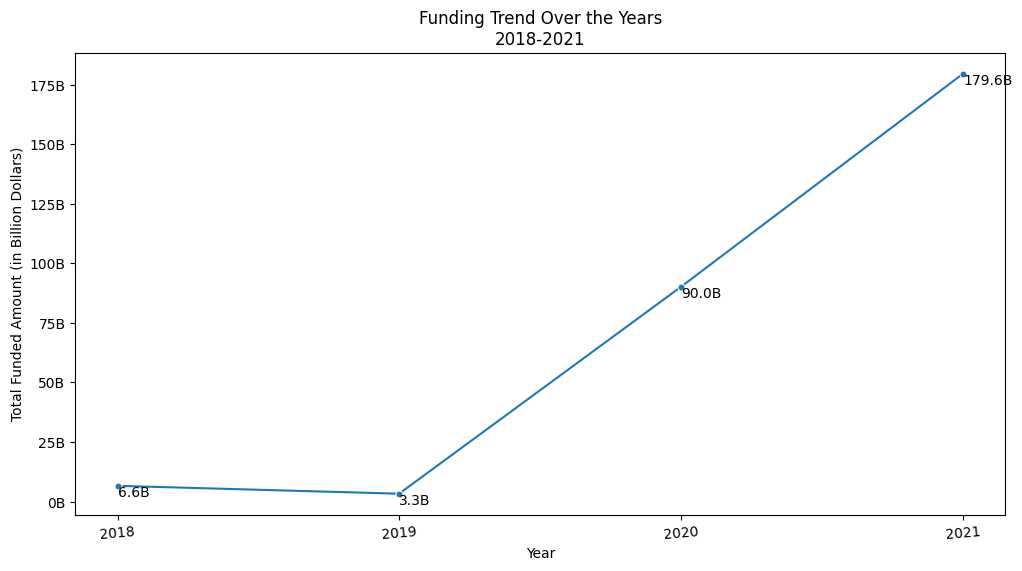

In [91]:


# Convert the 'amount' column to numeric type
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Group the data by year and calculate the total funded amount
funding_trend = df.groupby('year')['amount'].sum()

# Convert the result to a DataFrame
funding_trend = pd.DataFrame(funding_trend).reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=funding_trend, x='year', marker='o', markersize=5, y='amount')

# Set plot title and axis labels
plt.title('Funding Trend Over the Years\n2018-2021')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount (in Billion Dollars)')

# Rotate x-axis labels and format y-axis tick labels
plt.xticks(rotation=5)
ax.xaxis.set_major_locator(YearLocator())
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,}'.format(int(x))))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))

# Add data labels to the plot
for i, label in enumerate(funding_trend['amount']):
    year = funding_trend['year'].iloc[i]
    y_value = funding_trend['amount'].iloc[i]
    label_text = f'{label / 1e9:.1f}B' if not pd.isna(label) else 'N/A'
    plt.text(year, y_value, label_text, ha='left', va='top', color='black', fontsize=10)

# Display the plot
plt.show()

#### __Observations__ ####
- There was a modest decline in funding amounts between 2018 and 2019. However, from 2019 to 2021, there was a remarkable and abrupt increase, with a substantial difference of over 176 billion between the funding levels in 2019 and 2021.
- 2021 is by far the best funded year with over 179B in funding

#### __7.11 Evolution of Funding Trends Across Top Locations Over the Years__ ####

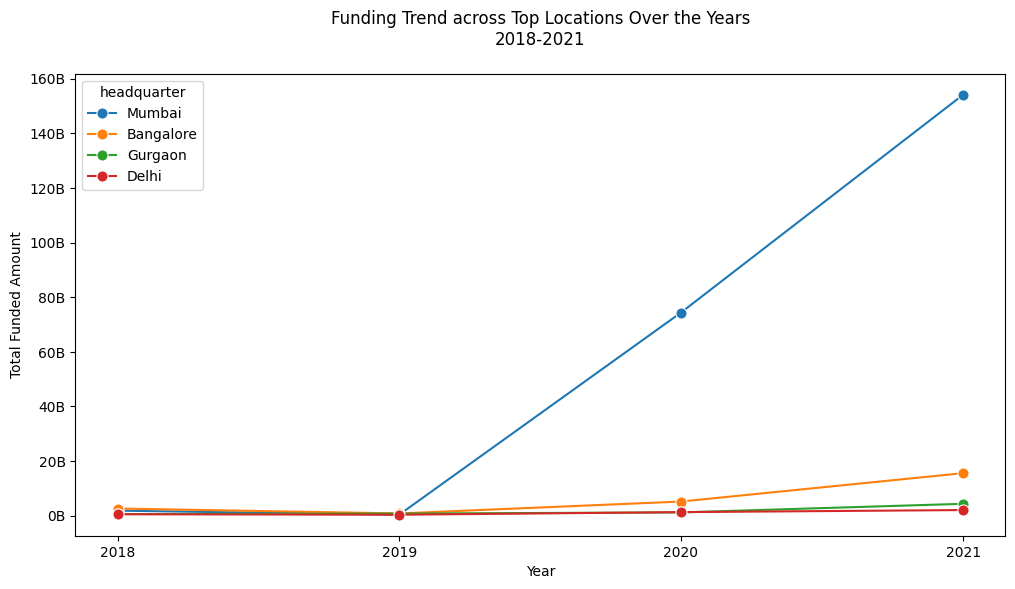

In [92]:
# plot a line graph for the top four funded locations
df['year'] = pd.to_datetime(df['year'], format='%Y')
location_trend = df.groupby(['headquarter', 'year'])['amount'].sum().sort_values(ascending=False)
top_locations = location_trend.groupby('headquarter').sum().nlargest(4).index
# Filter the original DataFrame for the top 5 locations
location_trend_top4 = location_trend[location_trend.index.get_level_values('headquarter').isin(top_locations)].reset_index()
location_trend_top4_reset = location_trend_top4.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=location_trend_top4_reset, x='year', y='amount', hue='headquarter', marker='o', markersize=8)
plt.title('Funding Trend across Top Locations Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.xaxis.set_major_locator(YearLocator())
plt.show()

#### __Observations__ ####
Mumbai stands out as the most well-funded location, exhibiting a funding trend that closely mirrors the overall funding pattern. In contrast, Bangalore, Gurgaon, Delhi and all other cities follow at a considerable distance.

### __7.12 Evolution of Funding Trends Across Top Sectors Over the Years__ ##

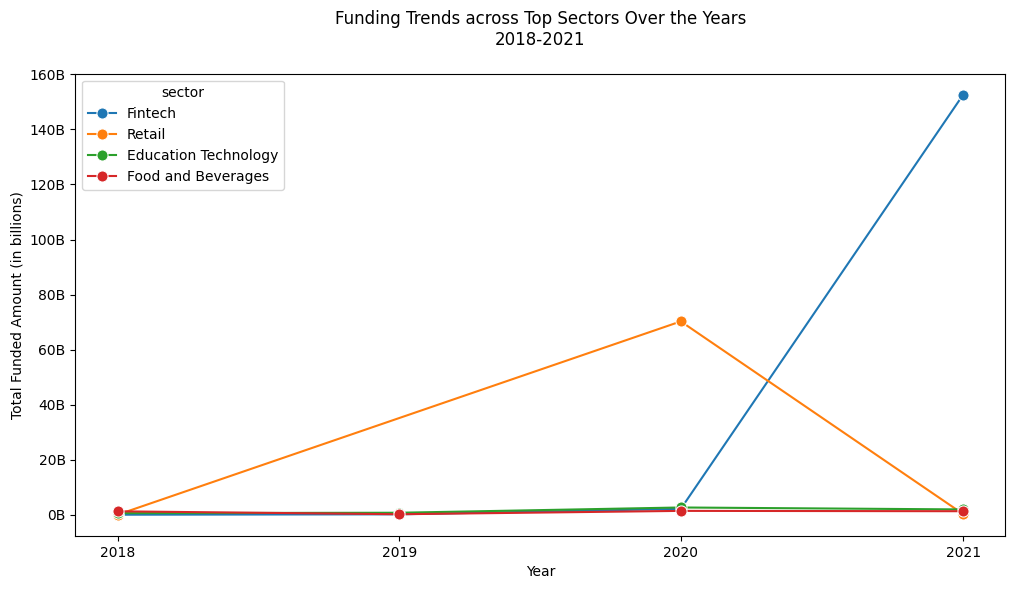

In [93]:
# Plot a line graph to visualize trend of funding across top top_sectors
df['year'] = pd.to_datetime(df['year'], format='%Y')
sector_trend = df.groupby(['sector', 'year'])['amount'].sum().sort_values(ascending=False)
top_sectors = sector_trend.groupby('sector').sum().nlargest(4).index
sector_trend_top4 = sector_trend[sector_trend.index.get_level_values('sector').isin(top_sectors)].reset_index()
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=sector_trend_top4, x='year', y='amount', hue='sector', marker='o', markersize=8)
plt.title('Funding Trends across Top Sectors Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount (in billions)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.xaxis.set_major_locator(YearLocator())
plt.show()

### __Observations__ ###
Retail has undergone a notable evolution in its funding trend. Initially, it exhibited a steep upward trajectory until 2020, followed by a sudden decline between 2020 and 2021.

In contrast, fintech consistently lagged significantly behind retail until 2020, only to experience a sudden upward trajectory thereafter, ultimately emerging as the best-funded sector.

 #### __7.13 Evolution of Funding Trends Across Startup Stages Over the Years__ ####

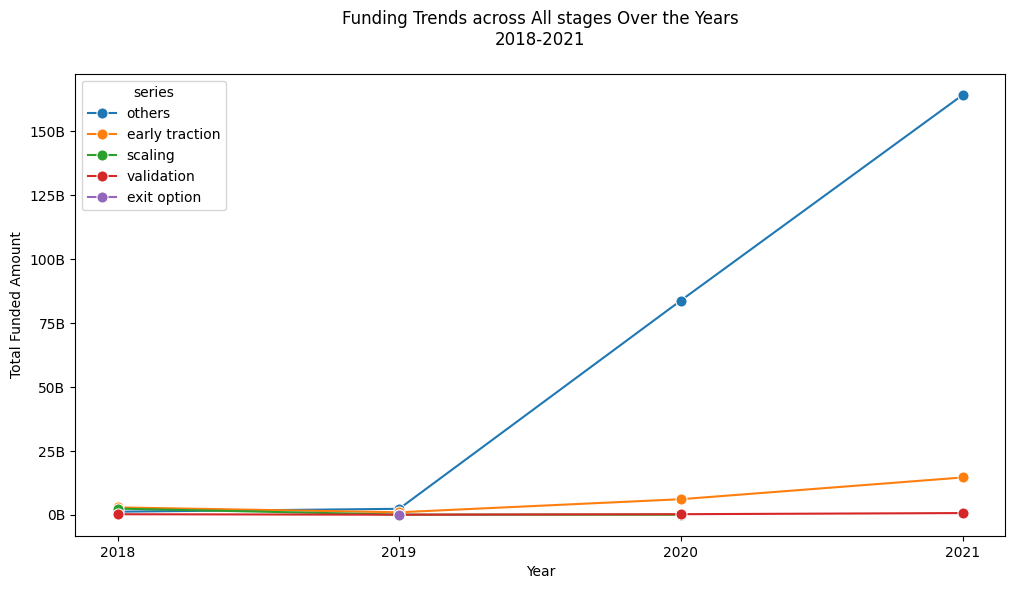

In [94]:
# plot a line graph for the top four funded series
df['year'] = pd.to_datetime(df['year'], format='%Y')
series_trend = df.groupby(['series', 'year'])['amount'].sum().sort_values(ascending=False)
top_series = series_trend.groupby('series').sum().index
# Filter the original DataFrame for the top 4 series
series_trend_top4 = series_trend[series_trend.index.get_level_values('series').isin(top_series)].reset_index()
series_trend_top4_reset = series_trend_top4.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=series_trend_top4_reset, x='year', y='amount', hue='series', marker='o', markersize=8)
plt.title('Funding Trends across All stages Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.xaxis.set_major_locator(YearLocator())
plt.show()

#### __Observations__ ####
From the Graph above, Over the years, "Other" category which includes Private Equity, Corporate Round, Undisclosed, Non-equity Assistance, Debt, Bridge, and Edge has seen a tremendous growth in the amount of funding received. These types of funding are often associated with more mature startups. As the startup ecosystem has matured, investors have become more comfortable investing in later-stage startups that are closer to profitability.

### __Concclusion__ ###
__Startup Funding Trends__

Startup funding is experiencing a significant surge, especially in the financial technology (Fintech) sector. Among various locations, Mumbai stands out as the epicenter of this growth.

__Key Points:__

Rising Trends: Startup funding is on a tremendous rise.
Location Spotlight: Mumbai leads the charts as the location with the most substantial rise in startup funding.
Industry Focus: Fintech emerges as the industry experiencing the most significant surge in funding.

#### __7.2 What is the relationship between the amount of funding and the stage of the company?__ ####

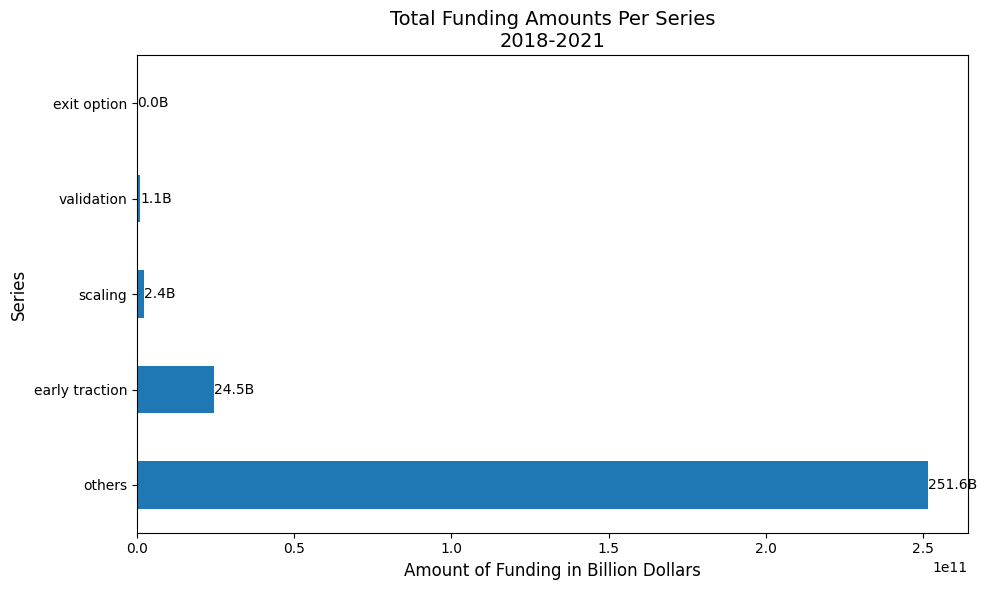

In [95]:
stage_funding_dist = df.groupby('series')['amount'].sum().sort_values(ascending=False)
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
stage_funding_dist.plot(kind='barh', ax=ax)
ax.set_title('Total Funding Amounts Per Series\n2018-2021', fontsize=14)
ax.set_xlabel('Amount of Funding in Billion Dollars', fontsize=12)
ax.set_ylabel('Series', fontsize=12)

# Annotate the bars
for i, (series, amount) in enumerate(stage_funding_dist.items()):
    ax.annotate(f'{amount / 1e9:.1f}B', xy=(amount, i), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

#### __Observations__ ####
- Category 'Others' being the best funded stage received 251B in total
- Exit option is the worst funded with about a Billion in funding
- A clear trend emerges – the more mature the startup, the more likely it is to attract substantial funding

### __7.20 Average Funding Received in Different Stages__ ###

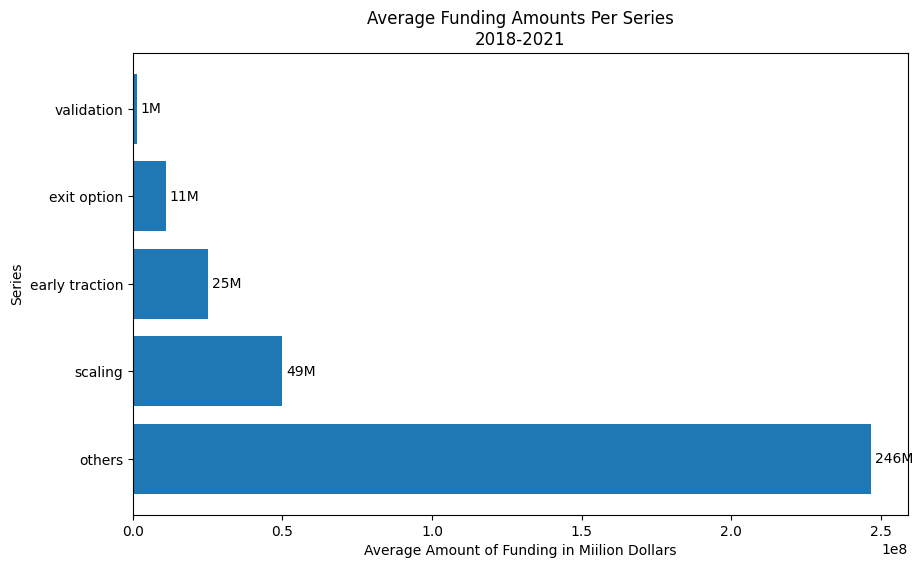

In [96]:
# Average funding received by startups in different stages
stage_funding_dist_avg = df.groupby('series')['amount'].mean().sort_values(ascending=False)
stage_funding_dist_avg = pd.DataFrame(stage_funding_dist_avg)

# Limiting the number of categories to plot
num_categories = 10  # You can adjust this value according to your preference
top_categories = stage_funding_dist_avg.head(num_categories)

plt.figure(figsize=(10, 6))  # Reduced figure size

# Plot horizontal bar chart
bars=plt.barh(top_categories.index, top_categories['amount'])

plt.title('Average Funding Amounts Per Series\n2018-2021')
plt.xlabel('Average Amount of Funding in Miilion Dollars')
plt.ylabel('Series')
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{int(width / 1e6)}M',
                 xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0),  # 3 points horizontal offset
                 textcoords='offset points',
                 ha='left', va='center', fontsize=10)


plt.show()

##### __Conclusion__ #####
We can comfortably infer that startups that are more muture get more funding on average

#### __7.3 How does funding vary with the location of the start-ups__ ####

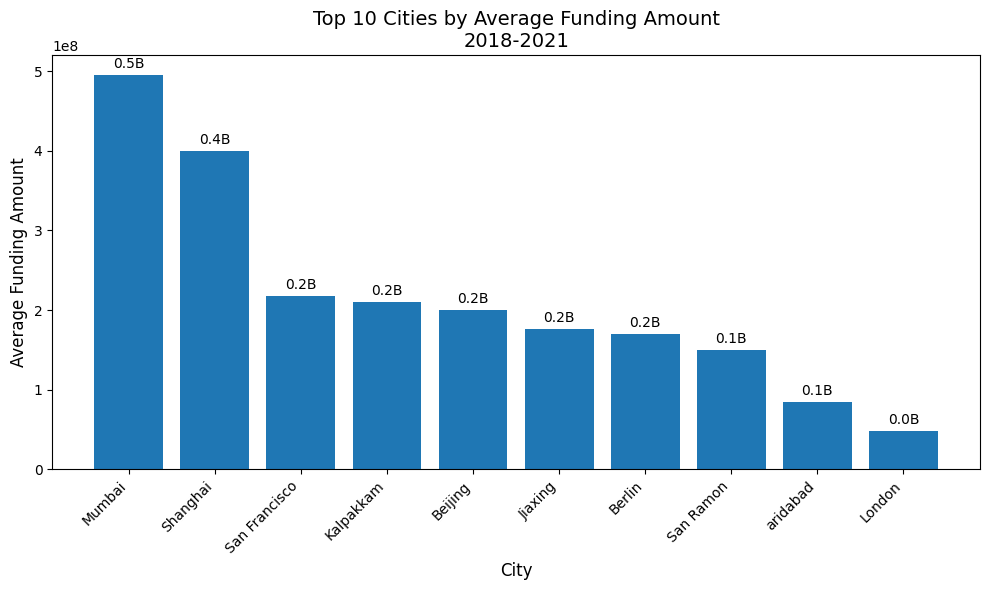

In [97]:
# Group by 'headquarter' and calculate the mean amount
location_funding = df.groupby('headquarter')['amount'].mean().reset_index()

# Sort by mean funding amount and select the top 10 cities
top_10_cities = location_funding.sort_values('amount', ascending=False).head(10)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_10_cities['headquarter'], top_10_cities['amount'])

# Add labels and title
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Funding Amount', fontsize=12)
plt.title('Top 10 Cities by Average Funding Amount\n2018-2021', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the mean funding amount
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height / 1e9:.1f}B',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#### __Observations__ ####
- Mumbai's startups get the most money on average. Shanghai gets less, quite a bit behind. It's like a funding showdown between the two cities.
- There's clear variation in funding across different cities. Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing startups are more likely to secure over $0.2 billion on average.

#### __Conclusion__ ####
- Startups located in Mumbai and San Francisco receive more funding 
on average than startups in other locations.

 #### __7.4 What are the most attractive sectors for investors?__ ####

#### __7.40 Total Funding per Sector__ ####

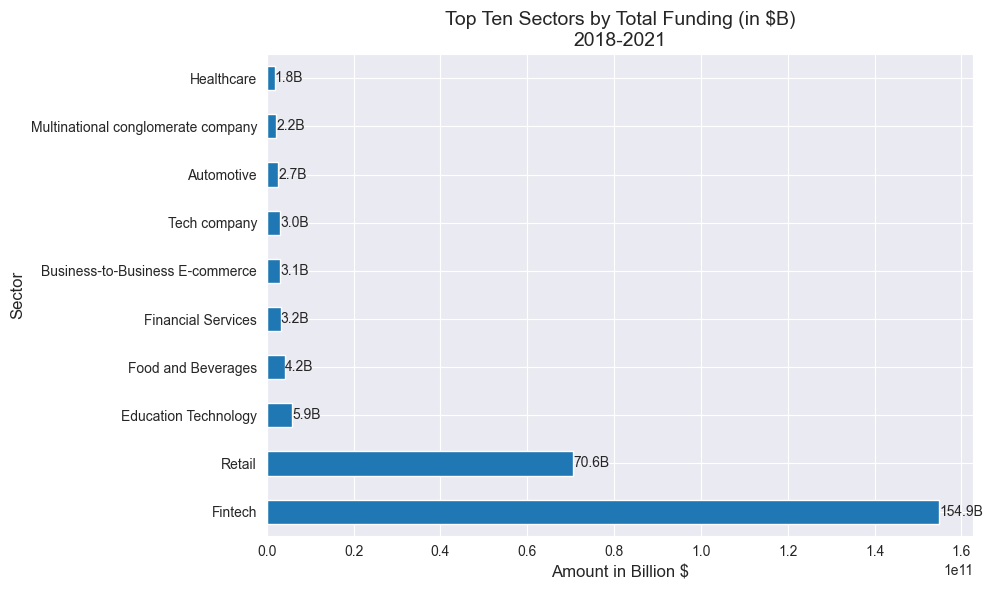

In [98]:
# Sort sectors by funding amount
sectors_by_funding = df.groupby('sector')['amount'].sum().sort_values(ascending=False)

# Select top ten sectors
top_ten_sectors_by_funding = sectors_by_funding.head(10)

# Set Seaborn style
sns.set_style("darkgrid")

# Plotting using Pandas
fig, ax = plt.subplots(figsize=(10, 6))
top_ten_sectors_by_funding.plot(kind='barh', ax=ax)
ax.set_title('Top Ten Sectors by Total Funding (in $B)\n2018-2021', fontsize=14)
ax.set_xlabel('Amount in Billion $', fontsize=12)
ax.set_ylabel('Sector', fontsize=12)

# Annotate the bars
for i, (sector, amount) in enumerate(top_ten_sectors_by_funding.items()):
    ax.annotate(f'{amount / 1e9:.1f}B', xy=(amount, i), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

#### __Observations__ ####
- Fintech and retail sectors stand out as the most attractive for investors.
- The two sectors have received the most funding over the year
- These sectors have received significant funding, making them key players in the startup investment landscape.

#### __7.41 Average Funding per Sector__ ####

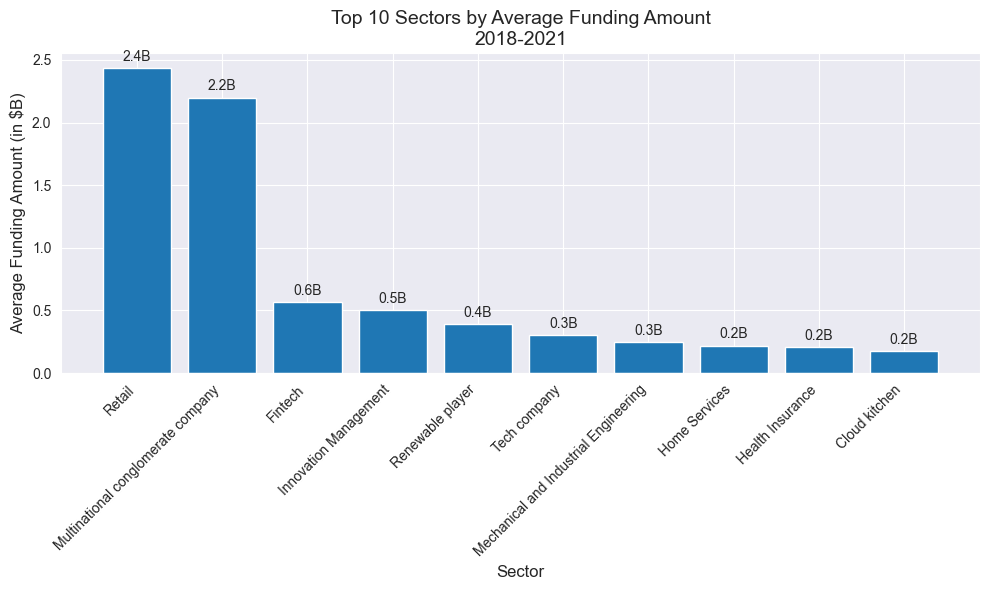

In [99]:
# Find the average funding amount for each sector
avg_sectors_funding = df.groupby('sector')['amount'].mean().reset_index()

# Convert the amount to billion dollars
avg_sectors_funding['amount_in_billion'] = avg_sectors_funding['amount'] / 1e9

# Sort sectors by average funding amount and select the top 10
top_ten_sectors = avg_sectors_funding.sort_values('amount_in_billion', ascending=False).head(10)

# Set Seaborn style
sns.set_style("darkgrid")

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_ten_sectors['sector'], top_ten_sectors['amount_in_billion'])

# Add labels and title
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Average Funding Amount (in $B)', fontsize=12)
plt.title('Top 10 Sectors by Average Funding Amount\n2018-2021', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the average funding amount
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}B',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#### __Observations__ ####
__1. Retail Dominance:__

On average, retail startups secured the highest funding from 2018 to 2021, indicating strong investor interest.

___2. Fintech Discrepancy:__

While fintech received the most funds in total, the average funding per startup was significantly lower at $0.55 billion.
In contrast, retail startups averaged a substantial $2.4 billion, highlighting a considerable difference in individual funding amounts.

__Conclusion__
The most attractive sectors for investors are Retail and Fintech

### __7.5 Does the location of the company influence its sector?__

In [100]:
# Get the top 7 sectors and top 7 locations based on total funding amount
top_sectors = df.groupby('sector')['amount'].sum().sort_values(ascending=False).head(7).index
top_locations = df.groupby('headquarter')['amount'].sum().sort_values(ascending=False).head(7).index

# Filter the DataFrame for the top 7 sectors and top 7 locations
df_top7 = df[df['sector'].isin(top_sectors) & df['headquarter'].isin(top_locations)]

# Create a heatmap
fig = px.density_heatmap(df_top7, 
                         x='headquarter', 
                         y='sector', 
                         title='Top 7 Sectors and Locations Heatmap \n2018-2021',
                         labels={'headquarter': 'Headquarter Location', 'sector': 'Sector'})
fig.show()

#### __Observations__ ####
#### __Top Industries and Locations:__ ####

- Top industries exhibit a concentration in the leading locations. Therefore, Location of a company does influences its sector

#### __Sectors Concentration:__ ####

- consistent pattern reveals a correlation between a sector's dominance and its prevalent location.
- This consistency suggests a nuanced influence of geography on flourishing industries.

##### __Outliers Analysis:__ ####

- Instances of outliers are notable, such as in Bangalore where Fintech and Education Tech industries concentrate more.

#### __Conclusion:__ ####

The data strongly supports the notion that top industries tend to concentrate in the leading locations.

## __Summary and Recommendations__ ##
### __Summary__ #3#

### __Funding Trends__ ###

- Funding experienced a modest decline from 2018 to 2019, followed by a remarkable increase of over $176 billion from 2019 to 2021.
- 2021 stands out as the best-funded year, surpassing $179 billion.

### __Geographical Dynamics__ ###

- Mumbai is the most well-funded location, with other cities trailing at a considerable distance.
- Notable variations across cities, with Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing leading.

### __Sector-Specific Insights__ ###

- Retail and fintech sectors attract the most funding, with 'Others' (Private Equity, Corporate Round, Debt) showing substantial growth.

### __Key Players__ ###

- Silver Lake and Mubadala Investment Company lead all investors, contributing a massive $70 billion.


## __Recommendations__ ##

__1. Location Consideration:__

- Investors should focus on top-funded locations like Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing.

__2. Sector-Specific Investments:__

- Explore opportunities in fintech and retail, the most attractive sectors for investors.

__ 3. Emerging Trends:__

- Monitor trends in mature startups in the 'Others' category, signaling investor comfort with later-stage ventures.
__ 4. Diversification:__

- Diversify portfolios across locations and sectors for a balanced risk-return profile.

In [101]:
df.to_csv('df.csv', index=False)